In [3]:
import numpy as np
import clustbench as cb
import sklearn.cluster as clst
import genieclust as gini
import matplotlib.pyplot as plt
import importlib
import plotter
import evaluator
from clustering.Scorer import Scorer
import Scorer
importlib.reload(plotter)
importlib.reload(evaluator)

<module 'evaluator' from 'C:\\Users\\18pep\\Documents\\sem_I\\DVaE\\clustering_dimensions_reduction\\clustering\\evaluator.py'>

In [4]:
datasets=['a1','a2','a3','aggregation','birch1','birch2','compound','d31','r15','flame','jain','pathbased','spiral','s1','s2','s3','s4','unbalance']

In [5]:
models=[clst.KMeans(),gini.Genie(gini_threshold=0.1),clst.DBSCAN]
models_names=['KMeans','Genie_01','DBSCAN']


In [7]:
def comparison_for_dataset(dataset,models,models_names):
    b=cb.load_dataset("sipu",dataset,path="./clustering-data-v1")
    plotter.plot_ref(b,dataset)
    scores={}
    results={}
    for model,name in zip(models,models_names):
        res=evaluator.Evaluator.evaluate_model(b,model,name)
        scores[name]=[]
        results[name]=res
        for i in res.keys():
            li=np.argwhere(b.n_clusters == i)[0][0]
            scores[name].append(Scorer.score_cluster(b.labels[li],res[i],name))
    print res
        

8
9
15
8
9
15
15
9
8
DBSCAN
DBSCAN
DBSCAN


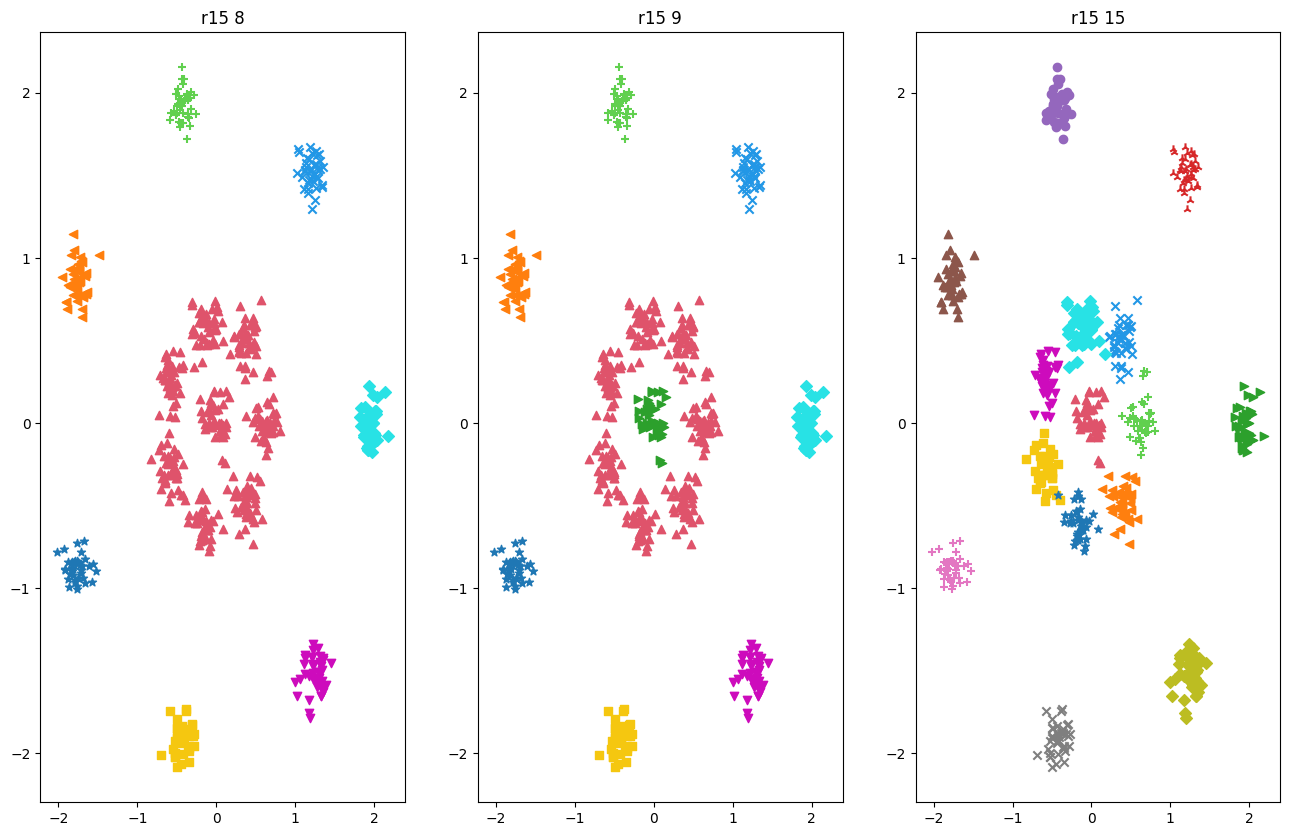

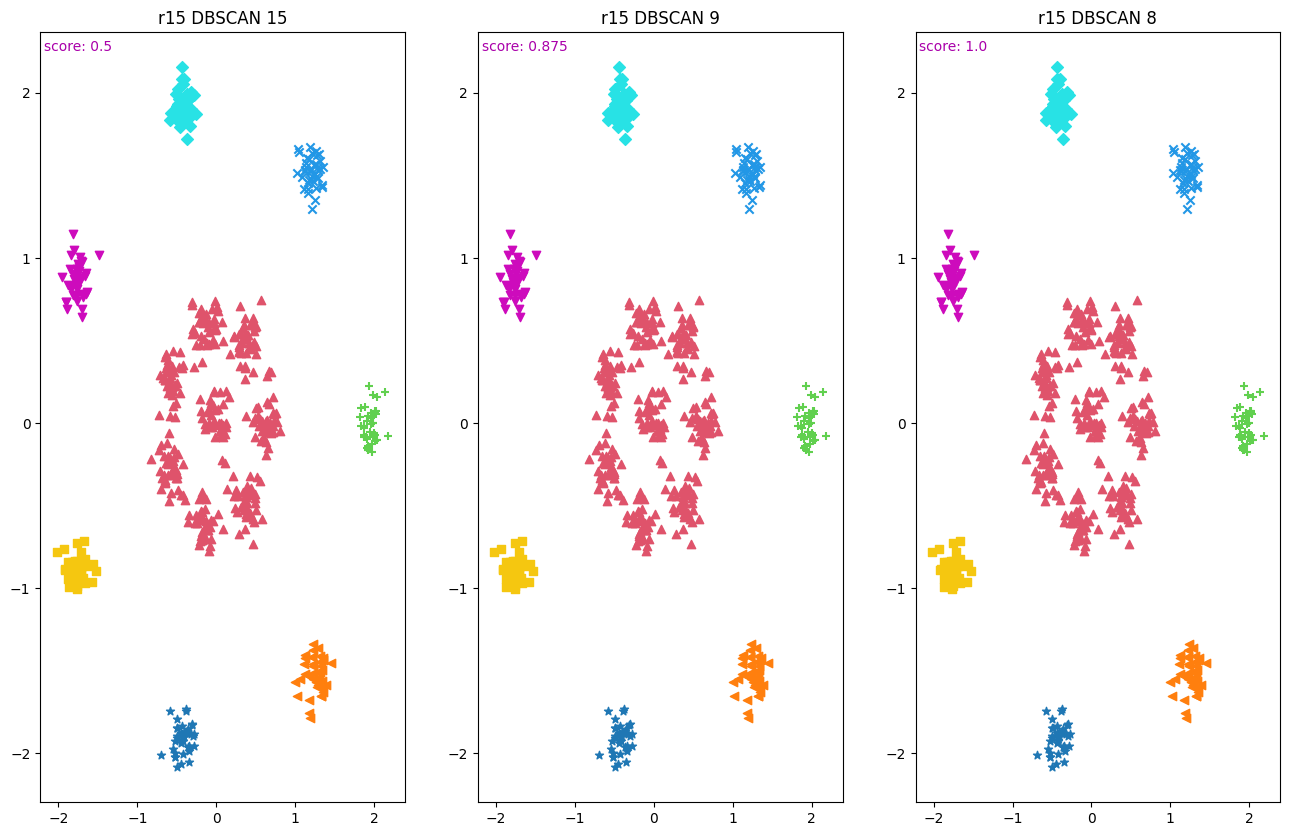

In [8]:
importlib.reload(plotter)
importlib.reload(evaluator)
a=comparison_for_dataset("r15",models,models_names)